# Thermal wars
## Diffusion des particules, nombre, et température

### Import des librairies

In [104]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt

### Définition de quelques constantes

In [105]:
kb = 1.3*10**(-23)
T = 200
colors = ['blue','red','green','orange','black','yellow']

### Calcul de l'énergie cinétique

In [106]:
Ec = 3/2*kb*T

### Définition de quelques variables

In [107]:
#random.seed(4)
X = 1000 # nb de pas de temps
nb_part = 15 # nb de particules
to_hist = [] #liste pour visualiser dispersion des particules en fonction du temps

Variation aléatoire de la position d'une particule **y = f(t)**

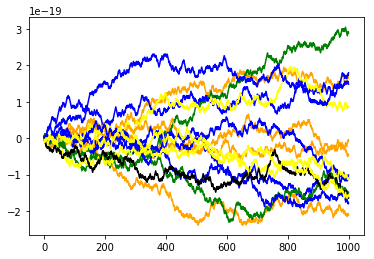

In [109]:
for i in range(1,nb_part+1):
    pos = 0
    L = []
    for x in range(0,X):
        pos += (random.choice((-1,1))*Ec)
        L.append(pos)
    to_hist.append(L)
    plt.plot(range(0,X),L,color= random.choice(colors))

Dispersion des particules au cours du temps

In [110]:
SDs = []
for i in range(0,X):
    tmp_list = []
    for j in range(0, len(to_hist)):
        tmp_list.append(to_hist[j][i])
    SDs.append(max(tmp_list) - min(tmp_list))

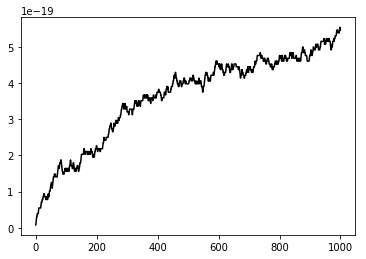

In [111]:
plt.plot(range(0,X),SDs, color = "black")

On transforme le code en fonctions

In [112]:
def cinetik_calc (tempe) :
    res = 3/2*kb*tempe
    return(res)

def tohist (to_hist,X) :
    SDs = []
    for i in range(0,X):
        tmp_list = []
        for j in range(0, len(to_hist)):
            tmp_list.append(to_hist[j][i])
        SDs.append(max(tmp_list) - min(tmp_list))
    return(SDs)

def plotmaker (nb_part,X,temper) :
    to_hist = []
    for i in range(1,nb_part+1):
        pos = 0
        L = []
        for x in range(0,X):
            pos += (random.choice((-1,1))*cinetik_calc(temper))
            L.append(pos)
    #print(np.std(L))
        to_hist.append(L)
    return(tohist(to_hist,X))

Visualisation de l'influence de la température sur la diffusion des particules

température (K) | Couleur
----------------|--------
    0           | blue   
50| red
100| green
200| orange
300| black
400| yellow


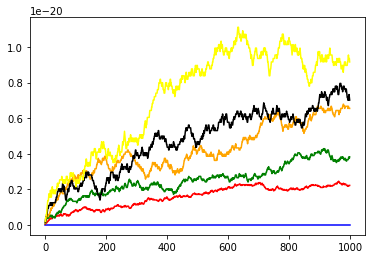

In [113]:
temp = [0,50,100,200,300,400]
for i in range(0,len(temp)) :
    plt.plot(range(0,X),plotmaker(nb_part,X,i) , color = colors[i])